In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

### A definition
- I used $R$ to mean the autocorrelation as opposed to the autocovariance 
$$ R(l) = \frac{C(l)}{C(0)} $$

### A Typo
$$t_l = \frac{R(l) \sqrt{n-l-2}}{\sqrt{1-R(l)^2}} $$

### Matrix Exponentials

- Suppose that $A$ has dimensions nxm. Then we cannot take $A^2$, because we would be trying to do an nxm x nxm matrix multiplication, which is not allowed
- one way to try and fix this is to pad a matrix with 0s, which makes the matrix square, however this will create repeated eigenvalues. Analytically is handled using something called the Jordan Normal form, numerically it just gets handled when you do the calculation.


In [10]:
A=np.array([[0,1,2],[0,0,1]])
print(A)
la.expm(A)

[[0 1 2]
 [0 0 1]]


LinAlgError: Last 2 dimensions of the array must be square

In [11]:
A2=np.vstack([A,[0,0,0]])
print(A2)
la.expm(A2)

[[0 1 2]
 [0 0 1]
 [0 0 0]]


array([[1. , 1. , 2.5],
       [0. , 1. , 1. ],
       [0. , 0. , 1. ]])

### A special case of the fluctuation dissipation theorem 
- The full fluctuation dissipation theorem is: $$ AC+CA^T = BB^T $$

- Imagine that $A$ and $B$ are diagonal matrices, e.g. $$A=\begin{pmatrix}a_1 & 0 \\ 0 & a_2 \\ \end{pmatrix}$$ $$ B=\begin{pmatrix}b_1 & 0 \\ 0 & b_2 \\ \end{pmatrix} $$

- Then we can solve directly for $C$: $$C=\begin{pmatrix}c_1 & 0 \\ 0 & c_2 \\ \end{pmatrix} = \begin{pmatrix} \frac{b_1^2}{2a_1}  & 0 \\ 0 & \frac{b_2^2}{2a_2} \\ \end{pmatrix} $$

- We can compare this to the 1D OU process: $\gamma^2 \frac{\tau}{2}$. Essentially our process breaks up into separate components, which resemble 1D OU processes. 


E: [[ 0.99899557  0.00313845]
 [-0.00313845  0.99899557]]


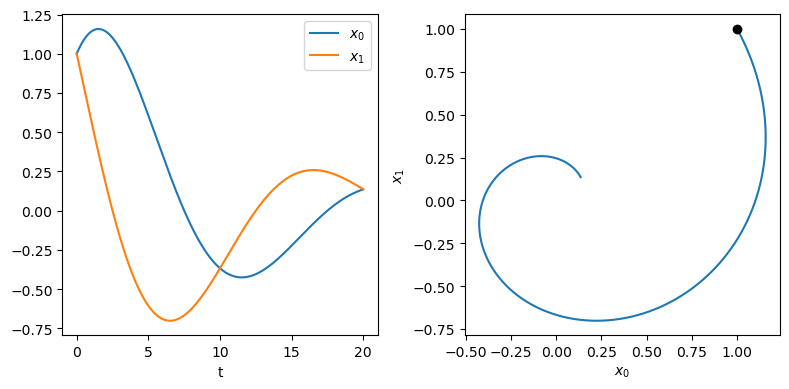

In [8]:
# Make some exampled damped oscillations using the matrix exponential 

# going to set dt=0.1 so that the curve is relatively smooth
dt = 0.01

# set some constants, you can vary these to test out different choices. 
tau = 10
f = 0.05

# define the matrix propogator
A = np.array([[-1/tau,2*np.pi*f],[-2*np.pi*f,-1/tau]])
E = la.expm(A*dt)

# lets see what E looks like 
# you can see all the values are less than 1 
# thats because the real part of the eigenvalue is negative, 
# so the solutions are damped
print('E:', E)

# some intial conditions
x0=np.array([1,1])

# how many steps to take
# I'm going to enforce that we take at least 2 e-foldings of timesteps
M=int(2*tau/dt)
t=np.arange(0,M*dt,dt)

#container for the data
x=np.zeros([M,2])
x[0,:]=x0
# main time loop
for i in range(1,M):
    x[i]=np.dot(E,x[i-1,:])

# make some quick plots
fig,axs=plt.subplots(1,2,figsize=(8,4),dpi=100)

axs[0].plot(t,x[:,0],label='$x_0$')
axs[0].plot(t,x[:,1],label='$x_1$')
axs[0].set_xlabel('t')
axs[0].legend()

axs[1].plot(x[:,0],x[:,1])
axs[1].plot(x0[0],x0[1],'ko')
axs[1].set_xlabel('$x_0$')
axs[1].set_ylabel('$x_1$')

fig.tight_layout()